In [8]:
import torch
import torchvision
import torchvision.transforms as transforms

In [9]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [10]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

0it [00:00, ?it/s]

170500096it [00:04, 39647894.66it/s]                               


Files already downloaded and verified


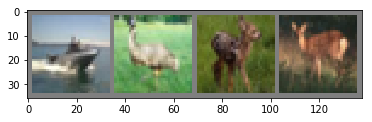

 ship  bird  deer  deer


In [11]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)

images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [14]:
images[0][0].size()

torch.Size([32, 32])

In [42]:
import torch.nn as nn
import torch.nn.functional as F

In [112]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 20, 5, padding=2)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(20, 40, 5, padding=2)
        self.conv3 = nn.Conv2d(40, 50, 5, padding=2)
        # img size is 5 * 5 after conv and max_poolings
        self.fc1 = nn.Linear(50 * 4 * 4, 180)
        self.fc2 = nn.Linear(180, 54)
        self.fc3 = nn.Linear(54, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        # print(x.shape)
        x = x.view(-1, 50 * 4 * 4)
        # print(x.shape)
        x = F.relu(self.fc1(x))
        # print(x.shape)
        x = F.relu(self.fc2(x))
        # print(x.shape)
        x = self.fc3(x)
        # print(x.size())
        return x

    
net = Net()




In [113]:
net = net.to(device)

In [114]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [115]:
for epoch in range(3):
    running_loss = 0
    for i, data in enumerate(trainloader):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        #print(outputs.size(), labels.size())
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
            
print('training done')

[1,  2000] loss: 2.267
[1,  4000] loss: 1.932
[1,  6000] loss: 1.703
[1,  8000] loss: 1.564
[1, 10000] loss: 1.441
[1, 12000] loss: 1.342
[2,  2000] loss: 1.259
[2,  4000] loss: 1.194
[2,  6000] loss: 1.168
[2,  8000] loss: 1.111
[2, 10000] loss: 1.074
[2, 12000] loss: 1.037
[3,  2000] loss: 0.952
[3,  4000] loss: 0.929
[3,  6000] loss: 0.918
[3,  8000] loss: 0.894
[3, 10000] loss: 0.905
[3, 12000] loss: 0.884
training done


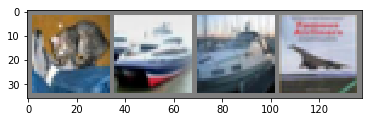

GroundTruth:    cat  ship  ship plane


In [121]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [122]:
images = images.to(device)
labels = labels.to(device)

outputs = net(images)

In [123]:
outputs

tensor([[-0.9640, -2.1148, -0.7459,  4.5687, -1.7046,  3.7163,  0.6628, -0.2101,
         -1.1617, -0.4474],
        [ 4.2324,  3.3896, -0.1526, -1.3815, -2.1187, -3.2354, -3.2160, -3.4984,
          6.4306,  0.8657],
        [ 1.9268,  0.5205,  0.1937,  0.2426, -0.9292, -1.1390, -1.1167, -1.5146,
          3.4160, -0.5591],
        [ 4.9842, -2.6700,  4.7513,  0.2319,  0.1481, -1.0129, -1.4854, -1.6832,
          0.7442, -1.3760]], device='cuda:0', grad_fn=<AddmmBackward>)

In [124]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship plane


In [125]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 69 %


In [126]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 80 %
Accuracy of   car : 79 %
Accuracy of  bird : 62 %
Accuracy of   cat : 53 %
Accuracy of  deer : 52 %
Accuracy of   dog : 61 %
Accuracy of  frog : 69 %
Accuracy of horse : 74 %
Accuracy of  ship : 81 %
Accuracy of truck : 75 %


In [37]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [38]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=180, bias=True)
  (fc2): Linear(in_features=180, out_features=54, bias=True)
  (fc3): Linear(in_features=54, out_features=10, bias=True)
)

In [40]:
data[0].size()

torch.Size([4, 3, 32, 32])

In [92]:
1

1